<h2> Fig 1 analysis and code to make figures <h2> 

In [2]:

#Load in some useful things. If you dont have them get them with pip. 
import json 
import numpy as np
import pickle 
pickle.HIGHEST_PROTOCOL = 4
import pandas as pd
from scipy.stats import norm, gaussian_kde
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import copy
import seaborn as sns
import dill #This will be used to store the workplace so you dont have to run certain cells
sns.set()
import os 
from os import walk
from math import nan
#import NPEETmaster.npeet.entropy_estimators as ee 

<h2> Median Calculation <h2> 

In [ ]:
#This is a simple code to calculate the median distances between all of the loci. It is straightforward (but some of the variables are named poorly)
#The results of this generates the data within the Single_Median folder. All of that data is also there. The script to make the heatmap is then in the next cell of this notebook

import time
from scipy.stats import entropy
from pathlib import Path
Npoints=1000

try:
    os.makedirs('Single_Median') 
except:
    print('Allready there')


(_, _, filenames) = next(os.walk('Linked_Trajectories'))
Cor=np.load('Linked_Trajectories/'+filenames[0])
num_of_loci=len(Cor)

Start=time.perf_counter()

#First step is going to be creating the dataframe with the proper size of empty lists

df2 = pd.DataFrame();
Array_Index=[]
for barcode1 in range(num_of_loci):
    Array_Index.append("barcode"+str(barcode1))
    Entropy_Array=np.zeros(num_of_loci)
    df2["barcode"+str(barcode1)]=Entropy_Array
df2["Inds"]=np.array(Array_Index)
df2.set_index('Inds',inplace=True)



for barcode1 in range(num_of_loci):

    print(barcode1/num_of_loci)
    clear_output(wait=True)

    file = "Distances/Distances_"+str(barcode1)
    df=pd.read_csv(file)

    for barcode2 in range(num_of_loci):
            if df2["barcode"+str(barcode1)]["barcode"+str(barcode2)]==0:
                if barcode2!=barcode1:

                    inds2=pd.notna(df["barcode"+str(barcode2)])

                    if len(df["barcode"+str(barcode2)][inds2])>Npoints:
                        
                        kiss=df["barcode"+str(barcode2)][inds2]

                        values=df["barcode"+str(barcode2)][inds2].values

                        Entropy=np.nanmedian(values)

                    else:
                        Entropy=nan

                    #kde_pdf, bb=np.histogram(df["barcode"+str(barcode2)], bins=x, range=None, normed=None, weights=None, density=True)
                    df2["barcode"+str(barcode1)]["barcode"+str(barcode2)]=Entropy
                    df2["barcode"+str(barcode2)]["barcode"+str(barcode1)]=Entropy

                


file = "Single_Median/Median"#+str(barcode1)
df2.to_csv(file,index=False)
print(time.perf_counter()-Start)


#except:

# print('There is a problem with '+Foldert)
#os.chdir('..')

<h2> Median Figure <h2> 

651
141.93660552370056


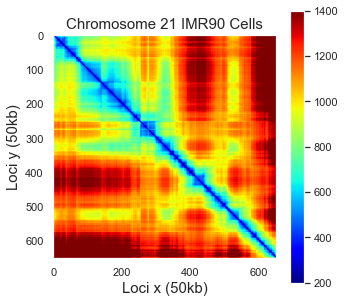

In [3]:

entstor=[]


num_of_loci=500
(_, _, filenames) = next(os.walk('Linked_Trajectories'))
Cor=np.load('Linked_Trajectories/'+filenames[0])
num_of_loci=len(Cor)



data_lin_dis = np.zeros((num_of_loci,num_of_loci))

for barcode1 in range(num_of_loci):
    #clear_output(wait=True)
    #print(barcode1/num_of_loci)
    try:
        for barcode2 in range(num_of_loci):
            if barcode2!=barcode1:

                Linear_Dist=np.abs(barcode1-barcode2)

                data_lin_dis[barcode1,barcode2]= Linear_Dist;
    except:
          print ("An error occurred")


file = "Single_Median/Median"#+str(barcode1)
df1=pd.read_csv(file)

#try:
   # CTCF_array=np.load('CTCF_array.npy')
#except:
   # print('no CTCF')


file = "Single_Median/Median"#+str(barcode1)
ff=pd.read_csv(file)

Entropy=ff.values
print(len(Entropy))


yax=np.zeros(num_of_loci);

for i in range(num_of_loci):
    yax[i]=i

fig=plt.figure()
cm = plt.cm.get_cmap('jet')

fig.set_size_inches(5,5)

vv1=plt.imshow((Entropy), cmap=cm)
print(np.min(Entropy[Entropy>0]))

plt.grid(b=None)
vv1.set_clim(200, 1400)
plt.colorbar(vv1)
plt.title('Chromosome 21 IMR90 Cells',fontsize=15)
plt.xlabel('Loci x (50kb)',fontsize=15)
plt.ylabel('Loci y (50kb)',fontsize=15)


plt.show()

fig.savefig("Figures/"+"Median.png", dpi=300, bbox_inches='tight')



<h2> Cumulative distributions given genomic distance <h2> 
    